In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/vehicle_emissions.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [8]:
df.shape

(935, 12)

In [11]:
df.isnull().sum()

,0
Model_Year,0
Make,0
Model,0
Vehicle_Class,0
Engine_Size,0
Cylinders,0
Transmission,0
Fuel_Consumption_in_City(L/100 km),0
Fuel_Consumption_in_City_Hwy(L/100 km),0
Fuel_Consumption_comb(L/100km),0


# Create features and target variable

In [12]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [13]:
X = df.drop(['CO2_Emissions'], axis = 1)
Y = df['CO2_Emissions']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [35]:
numerical_cols = ['Model_Year', 'Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)','Fuel_Consumption_comb(L/100km)']
categorical_cols = ['Make', 'Model', 'Vehicle_Class', 'Transmission']

In [36]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
]
)

In [37]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
]

)

In [38]:
preprocessor = ColumnTransformer([
    ('num',numerical_pipeline,numerical_cols),
    ('cat',categorical_pipeline,categorical_cols )
]
)

pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ]
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [43]:
encoded_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
print(encoded_columns)

['Make_Acura' 'Make_Alfa Romeo' 'Make_Aston Martin' 'Make_Audi' 'Make_BMW'
 'Make_Bentley' 'Make_Bugatti' 'Make_Buick' 'Make_Cadillac'
 'Make_Chevrolet' 'Make_Chrysler' 'Make_Dodge' 'Make_FIAT' 'Make_Ford'
 'Make_GMC' 'Make_Genesis' 'Make_Honda' 'Make_Hyundai' 'Make_Infiniti'
 'Make_Jaguar' 'Make_Jeep' 'Make_Kia' 'Make_Lamborghini' 'Make_Lexus'
 'Make_Lincoln' 'Make_MINI' 'Make_Maserati' 'Make_Mazda'
 'Make_Mercedes-Benz' 'Make_Mitsubishi' 'Make_Nissan' 'Make_Porsche'
 'Make_Ram' 'Make_Rolls-Royce' 'Make_Subaru' 'Make_Toyota'
 'Make_Volkswagen' 'Make_Volvo' 'Model_1500' 'Model_1500 4X4 EcoDiesel'
 'Model_1500 4X4 TRX' 'Model_1500 4X4 eTorque' 'Model_1500 Classic'
 'Model_1500 Classic 4X4' 'Model_1500 EcoDiesel'
 'Model_1500 HFE EcoDiesel' 'Model_1500 HFE eTorque' 'Model_1500 eTorque'
 'Model_228i xDrive Gran Coupe' 'Model_230i xDrive Coupe' 'Model_300'
 'Model_300 AWD' 'Model_430i xDrive Coupe' 'Model_4Runner 4WD'
 'Model_4Runner 4WD (Part-Time 4WD)' 'Model_500X AWD'
 'Model_530i xDriv

In [45]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)  # Root mean squared error
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

In [46]:
print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")  # Higher is better; 1.0 indicates perfect prediction
print(f"Root Mean Squared Error: {rmse:.2f}")  # Lower is better
print(f"Mean Absolute Error: {mae:.2f}")  # Lower is better


Model Performance Metrics:
R² Score: 0.9744
Root Mean Squared Error: 10.15
Mean Absolute Error: 3.12


In [47]:
joblib.dump(pipeline, 'vehicle_emissions_pipeline.joblib')

['vehicle_emissions_pipeline.joblib']

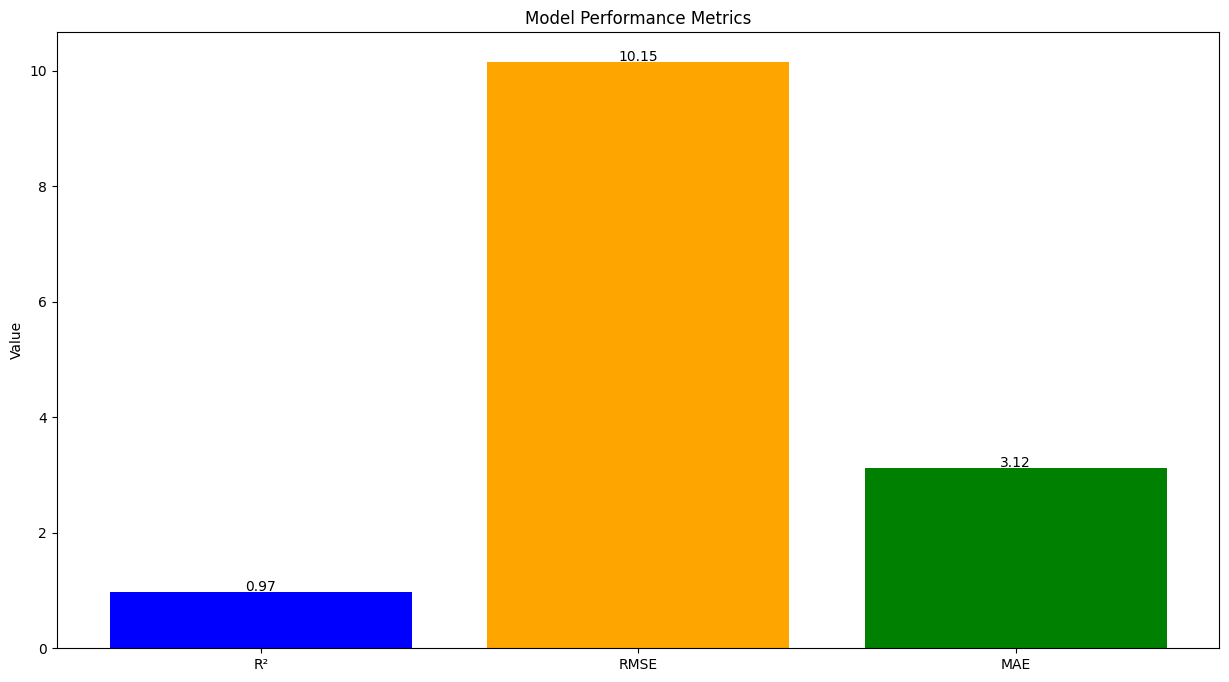

In [51]:
metrics = ['R²', 'RMSE', 'MAE']
values = [r2, rmse, mae]
plt.figure(figsize=(15, 8))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

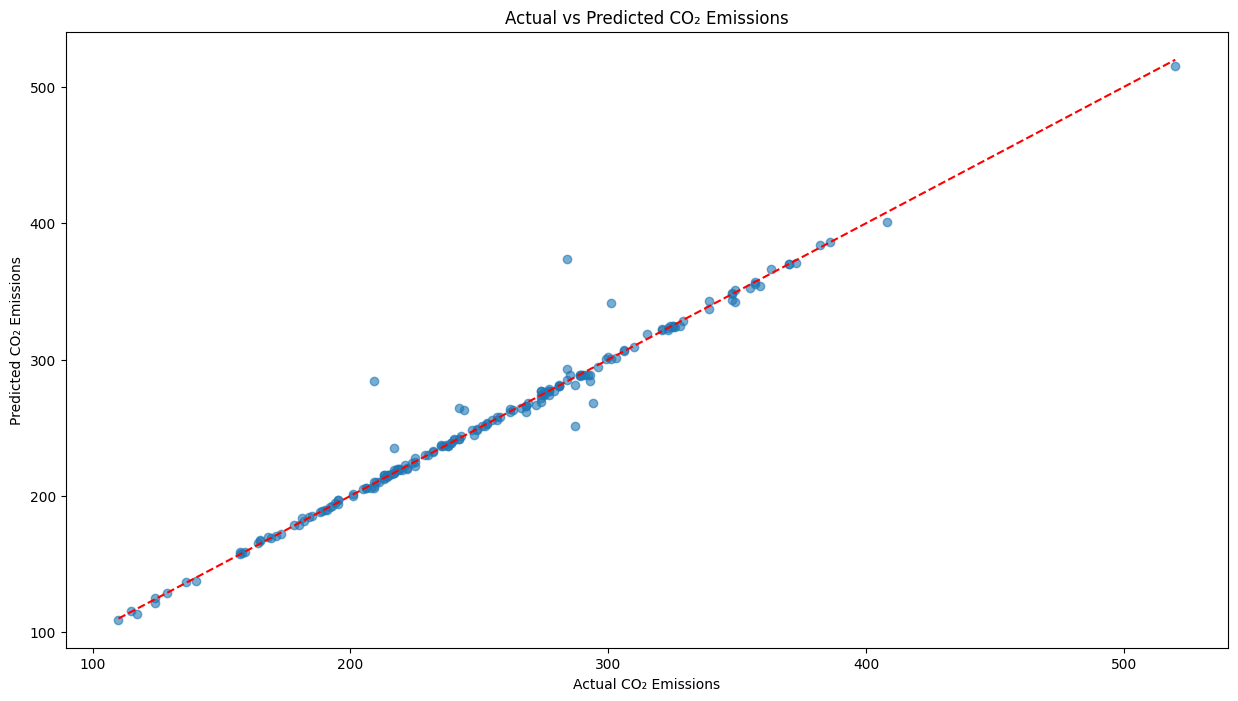

In [50]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, prediction, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.show()

<Figure size 1500x800 with 0 Axes>

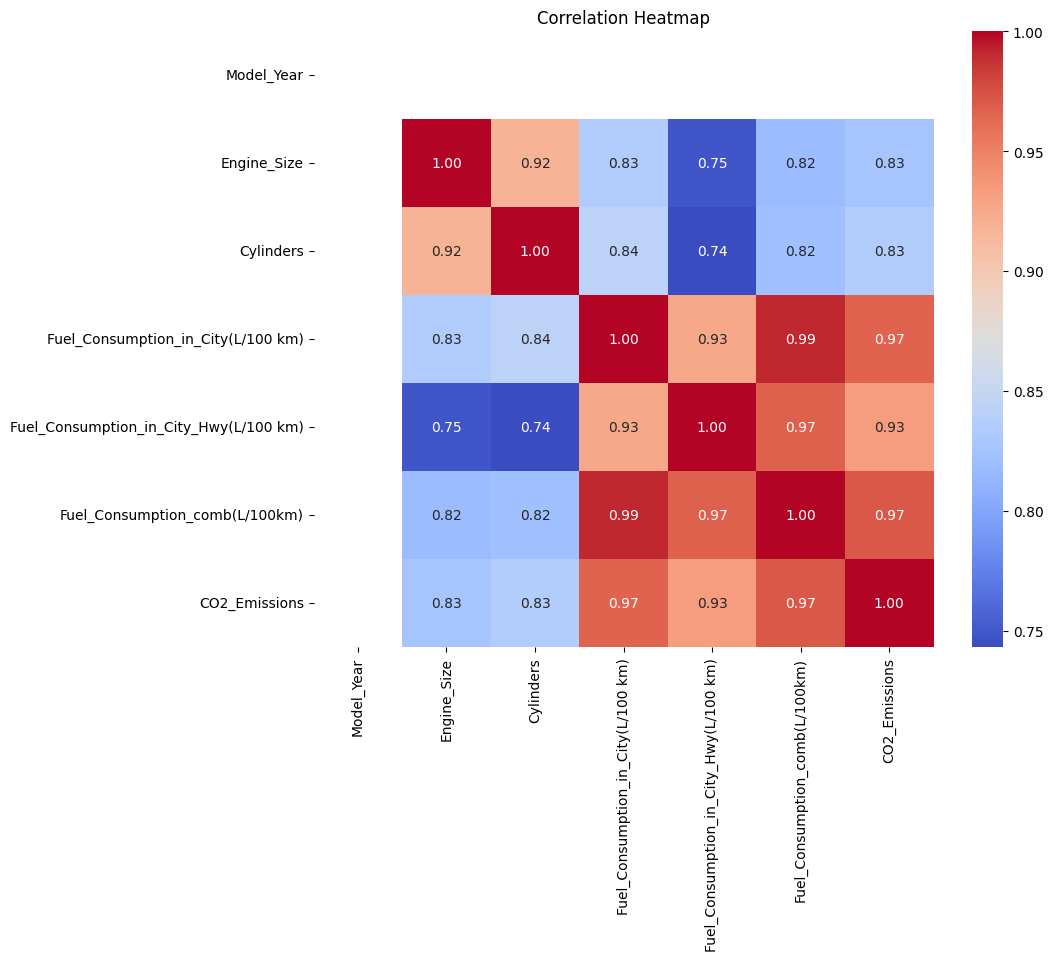

In [53]:
plt.figure(figsize=(15, 8))
corr_matrix = df[numerical_cols + ['CO2_Emissions']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()